In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import random
from sklearn.preprocessing import LabelEncoder



In [3]:
dataset = pd.read_csv("breast_cancer.csv")
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
x = dataset.iloc[:, 2:31].values
y = dataset.iloc[:, 1].values.T
x = (x - np.min(x)) / (np.max(x) - np.min(x))

labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 4)

x_train  = np.c_[np.ones(len(x_train)),x_train]
x_test  = np.c_[np.ones(len(x_test)),x_test]

In [5]:
iter = 20000
theta = np.zeros(x_train.shape[1]).T  
alpha = 0.1
n = len(x_train)

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    

In [7]:
cost = np.empty(iter)
for i in range(iter):
    z = x_train.dot(theta)
    Y_pred = sigmoid(z)
    cost[i] = (1 / n) * (-y_train.T.dot(np.log(Y_pred)) - (1 - y_train).T.dot(np.log(1 - Y_pred)) )
    theta = theta - (alpha / n) * (x_train.T.dot(Y_pred - y_train)) 
    Y_pred =  sigmoid(z)

In [8]:
h_theta = x_test.dot(theta)
h_theta[h_theta < 0.5] = 0
h_theta[h_theta >= 0.5] = 1

In [9]:
print("Model accuracy is:" , accuracy_score(y_test,h_theta) * 100)

Model accuracy is: 90.35087719298247


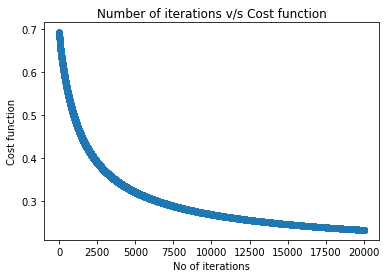

In [10]:

plt.plot(np.arange(0,iter),cost,'o')
plt.xlabel("No of iterations")
plt.ylabel("Cost function")
plt.title("Number of iterations v/s Cost function")
plt.show()